# Entrenamiento de un modelo cuántico en un conjunto de datos sobre RETO 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Insertar conjunto de datos 
train = pd.read_csv("challenge_train.csv")
test = pd.read_csv("challenge_test.csv")

In [4]:
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Imprimir valores cero de cada columna
print('No. of zero values in F1 ',train[train['F1']==0].shape[0])
print('No. of zero values in F2 ',train[train['F2']==0].shape[0])
print('No. of zero values in F3 ',train[train['F3']==0].shape[0])
print('No. of zero values in F4 ',train[train['F4']==0].shape[0])
# Reemplazar el valor 0 para cada columna con el promedio de cada columna
train['F1']=train['F1'].replace(0,train['F1'].mean())
train['F2']=train['F2'].replace(0,train['F1'].mean()) 
train['F3']=train['F3'].replace(0,train['F2'].mean()) 
train['F4']=train['F4'].replace(0,train['F3'].mean()) 


No. of zero values in F1  0
No. of zero values in F2  0
No. of zero values in F3  0
No. of zero values in F4  0


In [6]:
# Imprimir valores cero de cada columna
print('No. of zero values in F1 ',test[test['F1']==0].shape[0])
print('No. of zero values in F2 ',test[test['F2']==0].shape[0])
print('No. of zero values in F3 ',test[test['F3']==0].shape[0])
print('No. of zero values in F4 ',test[test['F4']==0].shape[0])
# Reemplazar el valor 0 para cada columna con el promedio de cada columna
test['F1']=test['F1'].replace(0,test['F1'].mean())
test['F2']=test['F2'].replace(0,test['F1'].mean()) 
test['F3']=test['F3'].replace(0,test['F2'].mean()) 
test['F4']=test['F4'].replace(0,test['F3'].mean()) 

No. of zero values in F1  0
No. of zero values in F2  0
No. of zero values in F3  0
No. of zero values in F4  0


Negative (0):  405
Positive (1):  395
Negative (0):  106
Positive (1):  94


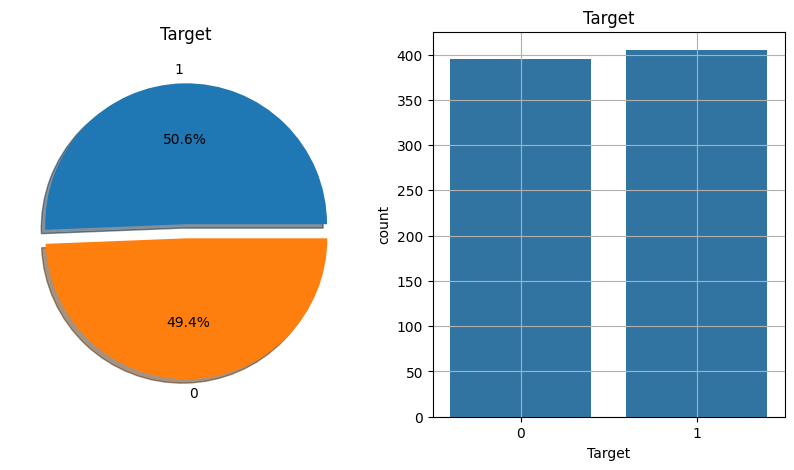

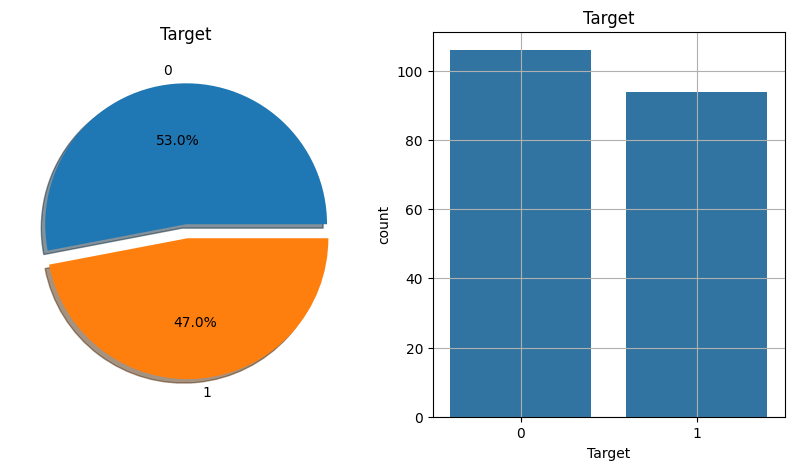

In [7]:
# gráfico de recuento de resultados
f, ax = plt.subplots(1, 2, figsize=(10, 5))
# Gráfico circular
train['Target'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Target')
ax[0].set_ylabel('')
# Count plot
sns.countplot(x='Target', data=train, ax=ax[1])
ax[1].set_title('Target')
N, P = train['Target'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
# gráfico de recuento de resultados
f, ax = plt.subplots(1, 2, figsize=(10, 5))
# Gráfico circular
test['Target'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Target')
ax[0].set_ylabel('')
# Count plot
sns.countplot(x='Target', data=test, ax=ax[1])
ax[1].set_title('Target')
N, P = test['Target'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

plt.show()

In [8]:
target_name = 'Target'
target_name = 'Target'
y_train = train[target_name]
X_train = train.drop(target_name, axis=1)
y_test = test[target_name]
X_test = test.drop(target_name, axis=1)

print("Features =\n", X_train)
print("labels =\n", y_train)
print("Features =\n", X_test)
print("labels =\n", y_test)

Features =
            F1        F2        F3        F4
0   -0.291592  1.854606 -0.226004  1.694754
1    0.327501  1.584748 -1.300541  0.471729
2    0.227985  1.512023 -0.646984 -0.743707
3   -0.453525  1.819041 -0.870957 -1.452390
4   -1.480420  1.278968 -1.193171 -0.000952
..        ...       ...       ...       ...
795 -0.311751 -0.933611 -1.505954 -1.204569
796 -1.052192  2.048640  0.348213 -0.002889
797  0.678061 -1.030919 -1.209414  1.269615
798 -1.027093  0.515353  1.169092 -1.533889
799  0.856716  1.661201  0.129642 -0.712822

[800 rows x 4 columns]
labels =
 0      1
1      1
2      1
3      1
4      1
      ..
795    0
796    1
797    0
798    1
799    1
Name: Target, Length: 800, dtype: int64
Features =
            F1        F2        F3        F4
0    1.866088  1.574254  0.138930 -0.351542
1    0.839427 -1.069518 -0.432655 -0.964800
2    0.557187 -0.921264 -0.379198 -0.003020
3   -0.694573  1.875495  0.533211  0.659735
4   -1.844339 -1.116098  1.074549 -0.156043
..        .

In [9]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print("Features =\n", X_train)
print("labels =\n", y_train)
print("Features =\n", X_test)
print("labels =\n", y_test)

Features =
 [[0.47127616 0.63945035 0.44096594 0.75885855]
 [0.57449798 0.58410799 0.28236492 0.56915001]
 [0.55790566 0.56919371 0.37882966 0.38061865]
 ...
 [0.63294732 0.0476897  0.29581521 0.69291343]
 [0.34864536 0.36479758 0.64688142 0.25805025]
 [0.66273462 0.59978692 0.49345913 0.38540937]]
labels =
 0      1
1      1
2      1
3      1
4      1
      ..
795    0
796    1
797    0
798    1
799    1
Name: Target, Length: 800, dtype: int64
Features =
 [[0.80301961 0.68591719 0.4136343  0.46613034]
 [0.61905527 0.04534474 0.3103077  0.35809433]
 [0.56848139 0.08126573 0.3199713  0.52752848]
 [0.34418224 0.75890637 0.48490919 0.64428436]
 [0.13815901 0.03405845 0.58276788 0.50057086]
 [0.90939317 0.06143022 0.56446854 0.47866017]
 [0.16449012 0.08999369 0.51791693 0.37624396]
 [0.14882658 0.07511866 0.40339287 0.43512872]
 [0.39049526 0.52718453 0.30452249 0.48983937]
 [0.25413692 0.3016067  0.38249335 0.57379801]
 [0.51761805 0.03783961 0.30914103 0.3786192 ]
 [0.08849315 0.0833399

# Entrenamiento de un modelo clásico de aprendizaje automático

In [10]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

In [12]:
train_features, test_features, train_labels, test_labels = X_train,X_test,y_train, y_test

In [13]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  
# suprimir la impresión del valor de retorno


In [14]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.4f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.4f}")

Classical SVC on the training dataset: 0.9888
Classical SVC on the test dataset:     0.9900


# Entrenamiento de un modelo de aprendizaje automático cuántico


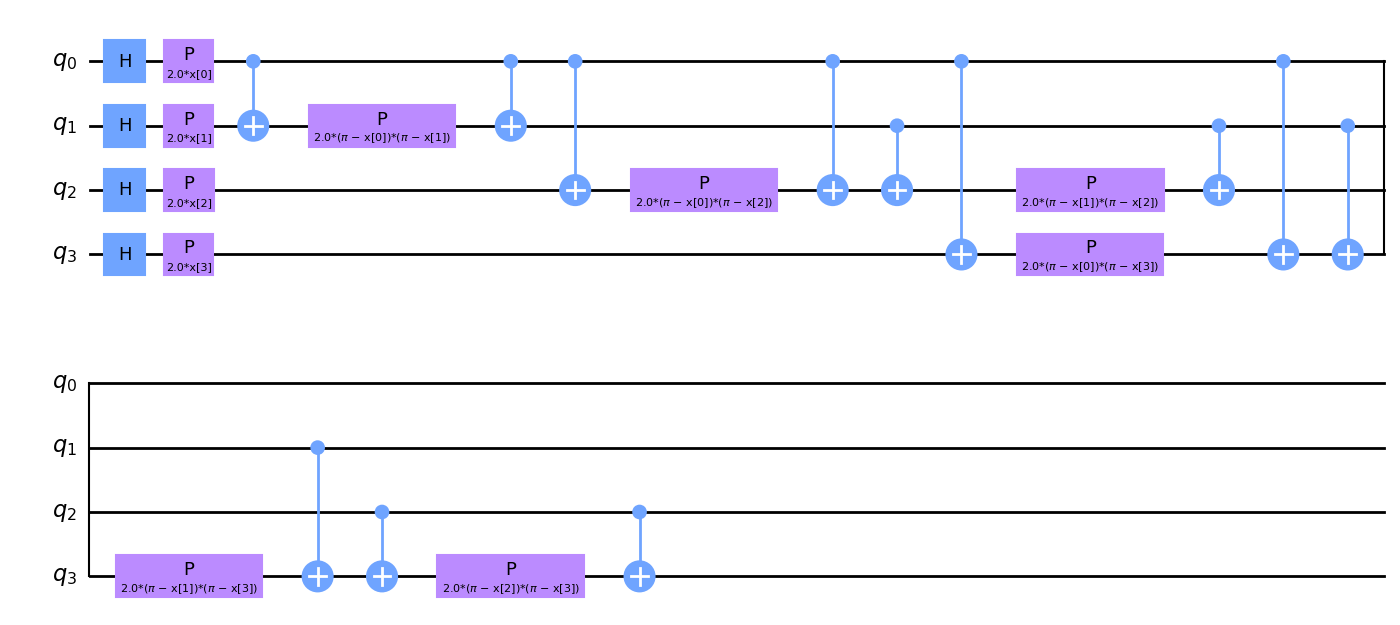

In [21]:
from qiskit.circuit.library import ZZFeatureMap

num_features = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

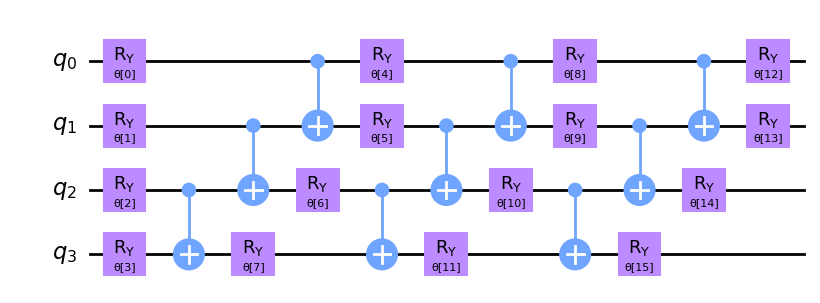

In [30]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [23]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [24]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [25]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Valor de la función objetivo frente a la iteración")
    plt.xlabel("Iteración")
    plt.ylabel("Valor de la función objetivo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

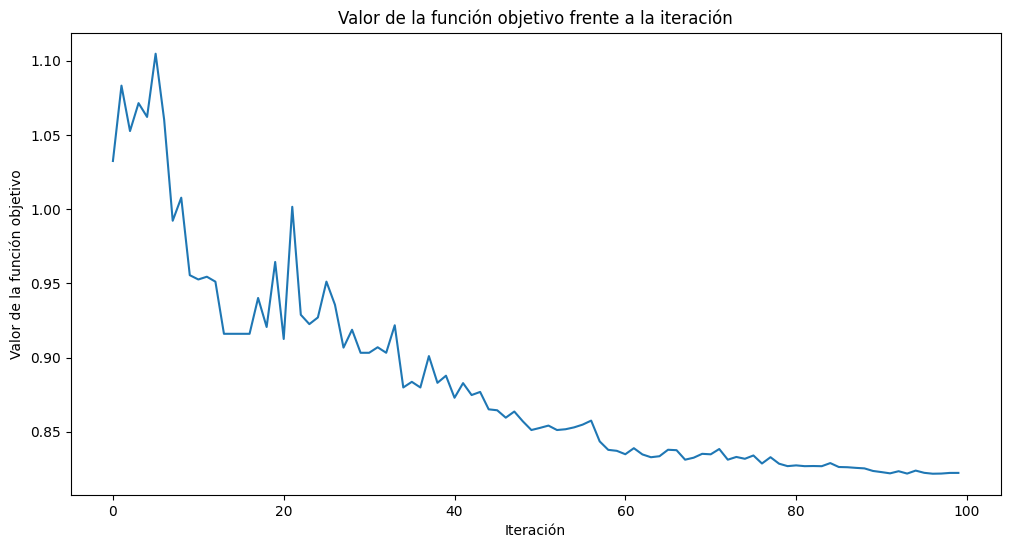

Training time: 2156 seconds


In [31]:
import time
import numpy as np
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [32]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.4f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.4f}")

Quantum VQC on the training dataset: 0.7625
Quantum VQC on the test dataset:     0.6900
